In [51]:
import os
import glob

import numpy as np

from tqdm import tqdm_notebook

from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

In [2]:
pulsar_name = '0531+21'
files = sorted(glob.glob('results_by_08.05.2019/gp_plot_txt/*' + pulsar_name + '*.csv'))

In [20]:
file = files[2]
profile = np.genfromtxt(file, skip_header=6)
profile = profile/np.max(profile)

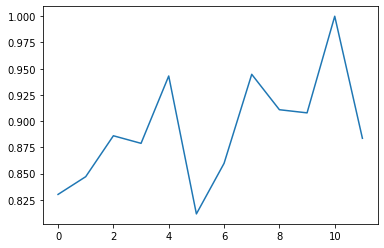

In [53]:
plt.close()
plt.plot(profile)
plt.show()

In [22]:
y = profile
x = range(len(profile))

In [61]:
def power_func(x, a, b, k): 
    return [a**float(i - b) - k for i in x]

def gaus(x,a,x0,sigma): 
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def exp_tail(x, a, b, k):
    return a*np.exp(x-b) - k

def linea_func(x, k, b):
    return k*x + b

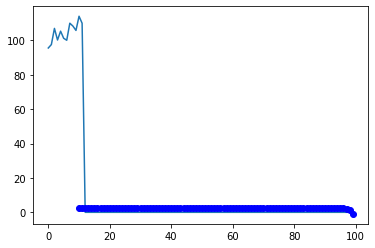

In [62]:
threshold = 10 
a = 1
b = 1 
k = 1
#popt_power_1, pcov = curve_fit(power_func,x[:threshold],y[:threshold],p0=[a, b, k]) 
 
popt_power_2, pcov = curve_fit(exp_tail,x[threshold:],y[threshold:],p0=[a, b, k], maxfev=200000)
plt.plot(x,y,label='data') 
#plt.plot(x[:threshold],power_func(x[:threshold],*popt_power_1),'ro:',label='fit_gaus') 
plt.plot(x[threshold:],exp_tail(x[threshold:],*popt_power_2),'bo:',label='fit_power') 
#plt.legend() 
plt.show()

In [63]:
popt_power_2

array([-8.47799196e-08,  8.14686355e+01, -2.55182329e+00])

KeyboardInterrupt: 

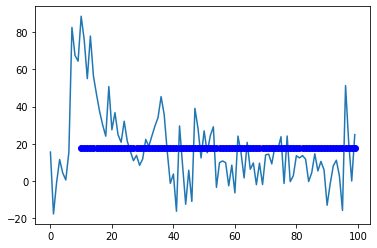

In [64]:
for file in tqdm_notebook(files):
    profile = np.genfromtxt(file, skip_header=6)
    
    if len(profile) == 100:
        pass
    else:
        profile = np.append(profile, np.zeros(100 - len(profile)))
    
    y = profile
    x = range(len(profile))
    
    plt.close()
    threshold = 10 
    a = 1
    b = 1 
    k = 1 
    #popt_power_1, pcov = curve_fit(power_func,x[:threshold],y[:threshold],p0=[a, b, k], maxfev=20000, method='dogbox') 

    popt_power_2, pcov = curve_fit(exp_tail,x[threshold:],y[threshold:],p0=[a, b, k], maxfev=200000)
    plt.plot(x,y,label='data') 
    #plt.plot(x[:threshold],power_func(x[:threshold],*popt_power_1),'ro:',label='fit_gaus') 
    plt.plot(x[threshold:],exp_tail(x[threshold:],*popt_power_2),'bo:',label='fit_power') 
    plt.savefig('./part_fit_res/' + os.path.basename(file)[:-4] + '.png', format='png')

In [40]:
file

'results_by_08.05.2019/gp_plot_txt\\09.05.2012_plot_0531+21_18.csv'